# Data from EIA Annual Electric Power Industry Report, Form EIA-861 detailed data files

https://www.eia.gov/electricity/data/eia861/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys

sys.path.append("/home/truggles/Inter-annual_Variability_Residual_Load")
from helpers import return_file_info_map

In [2]:
BAs = ['ERCO','NYIS','PJM',]
years = range(2013, 2020)
DR = pd.read_csv('DR_output.csv')

   Unnamed: 0  year    BA  Peak Available (MW)  Peak Actual (MW)  N Matches
0           0  2013  ERCO                239.5             151.6          9
1           1  2014  ERCO                402.5             312.3         14
2           2  2015  ERCO                491.4             347.7         11
3           3  2016  ERCO                567.6             397.0         13
4           4  2017  ERCO                613.0             410.7         15


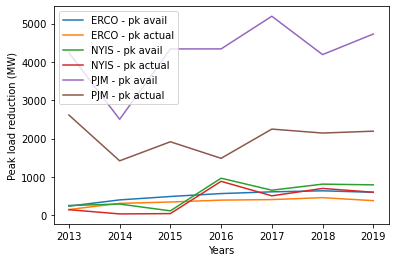

In [3]:
print(DR.head())
fig, ax = plt.subplots()
for ba in BAs:
    dr = DR.loc[ DR['BA'] == ba]
    ax.plot(dr['year'], dr['Peak Available (MW)'], label=f"{ba} - pk avail")
    ax.plot(dr['year'], dr['Peak Actual (MW)'], label=f"{ba} - pk actual")
plt.legend()
ax.set_xlabel('Years')
ax.set_ylabel('Peak load reduction (MW)')
plt.show()

In [4]:
def rename_BAs(ba):
    if ba == 'PJM':
        return ba
    if ba == 'FR':
        return ba
    if ba == 'ERCO':
        return 'ERCOT'
    if ba == 'NYIS':
        return 'NYISO'

def get_peak_loads(BAs, DR):
    peak_load = []
    mean_load = []
    for ba in BAs:
        dr = DR.loc[ DR['BA'] == ba]
        
        ba_info = return_file_info_map( rename_BAs(ba) )
        #print(ba_info)
        #print(f"../main_analysis/{ba_info['demand'][0]}")
        df = pd.read_csv(f"../{ba_info['demand'][0]}")
        for yr in dr['year'].values:
            pk = np.max( df.loc[ df['year'] == yr, 'demand (MW)'])
            peak_load.append(pk)
            mn = np.mean( df.loc[ df['year'] == yr, 'demand (MW)'])
            mean_load.append(mn)
    DR['Peak Demand (MW)'] = peak_load
    DR['Mean Demand (MW)'] = mean_load
    DR['Peak Reduction Available (% Peak)'] = DR['Peak Available (MW)'] / DR['Peak Demand (MW)'] * 100.
    DR['Peak Reduction Actual (% Peak)'] = DR['Peak Actual (MW)'] / DR['Peak Demand (MW)'] * 100.
    DR['Peak Reduction Available (% Mean)'] = DR['Peak Available (MW)'] / DR['Mean Demand (MW)'] * 100.
    DR['Peak Reduction Actual (% Mean)'] = DR['Peak Actual (MW)'] / DR['Mean Demand (MW)'] * 100.
    print(DR.head(30))
get_peak_loads(BAs, DR)

    Unnamed: 0  year    BA  Peak Available (MW)  Peak Actual (MW)  N Matches  \
0            0  2013  ERCO              239.500           151.600          9   
1            1  2014  ERCO              402.500           312.300         14   
2            2  2015  ERCO              491.400           347.700         11   
3            3  2016  ERCO              567.600           397.000         13   
4            4  2017  ERCO              613.000           410.700         15   
5            5  2018  ERCO              639.500           461.400         14   
6            6  2019  ERCO              600.626           382.811         15   
7            7  2013  NYIS              256.700           147.100          7   
8            8  2014  NYIS              294.300            37.100          9   
9            9  2015  NYIS              117.100            45.400          8   
10          10  2016  NYIS              968.100           887.000         10   
11          11  2017  NYIS              

   Unnamed: 0  year    BA  Peak Available (MW)  Peak Actual (MW)  N Matches  \
0           0  2013  ERCO                239.5             151.6          9   
1           1  2014  ERCO                402.5             312.3         14   
2           2  2015  ERCO                491.4             347.7         11   
3           3  2016  ERCO                567.6             397.0         13   
4           4  2017  ERCO                613.0             410.7         15   

   Peak Demand (MW)  Mean Demand (MW)  Peak Reduction Available (% Peak)  \
0      67252.994892      37865.834824                           0.356118   
1      66464.064265      38825.092490                           0.605590   
2      69620.407614      39673.379528                           0.705828   
3      71092.609221      40007.774771                           0.798395   
4      69496.239761      40769.691539                           0.882062   

   Peak Reduction Actual (% Peak)  Peak Reduction Available (% Mean)

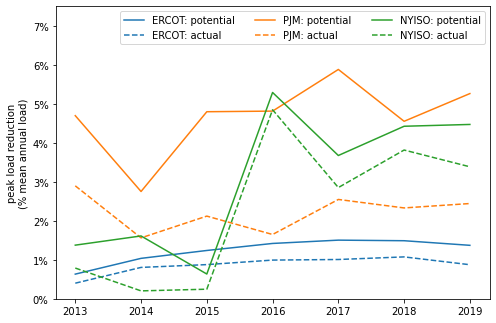

In [5]:
print(DR.head())

for D in ['Peak', 'Mean']:
    if D == 'Peak':
        continue
    fig, ax = plt.subplots(figsize=(7,4.6))
    BAs = ['ERCO','PJM','NYIS',]
    for ba in BAs:
        dr = DR.loc[ DR['BA'] == ba]
        p = ax.plot(dr['year'], dr[f'Peak Reduction Available (% {D})'], label=f"{rename_BAs(ba)}: potential")
        c = p[-1].get_color()
        ax.plot(dr['year'], dr[f'Peak Reduction Actual (% {D})'], color=c, linestyle='--', label=f"{rename_BAs(ba)}: actual")
    plt.legend(ncol=3)
    #plt.title(f"{A} DR: Denom {D}")
    ax.set_ylim(0, 7.5)
    ax.set_ylabel('peak load reduction\n(% mean annual load)')
    ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=100, decimals=0))
    plt.tight_layout()
    plt.savefig('plots/US_demand_response.pdf')